# Stock Price Prediction with LSTM

1. [Preprocess Data](#Preprocess-Data)
2. [Stacked LSTM](#Stacked-LSTM)
3. [Encoder-Decoder LSTM](#Encoder-Decoder-LSTM)
4. [Encoder-Decoder LSTM with Attention](#Encoder-Decoder-LSTM-with-Attention)

# Preprocess Data

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Dropout, LSTM, RepeatVector, TimeDistributed, Input, \
    multiply, concatenate, Activation, dot
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from util import get_features_labels

In [2]:
plt.rcParams["figure.figsize"] = (16, 8)

In [3]:
INPUT_PATH = 'data/'
OUTPUT_PATH = 'output/'
TICKER = 'aapl'
TRAIN_START = '20150101'
TEST_START = '20200101'
SEQ_LEN = 60
FORECAST_HORIZON = 1
N_HIDDEN = 50

In [4]:
# Load data
df = pd.read_csv(INPUT_PATH + TICKER + '.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True) # In case the data is not sorted
df.sort_index(ascending=True, axis=0, inplace=True)
df.tail()

,open,high,close,volume
date,,,,
2020-11-12,119.62,120.530,119.21,103350674.0
2020-11-13,119.44,119.672,119.26,81688586.0
2020-11-16,118.92,120.990,120.30,91183018.0
2020-11-17,119.55,120.674,119.39,74270973.0
2020-11-18,118.61,119.820,118.03,74550131.0


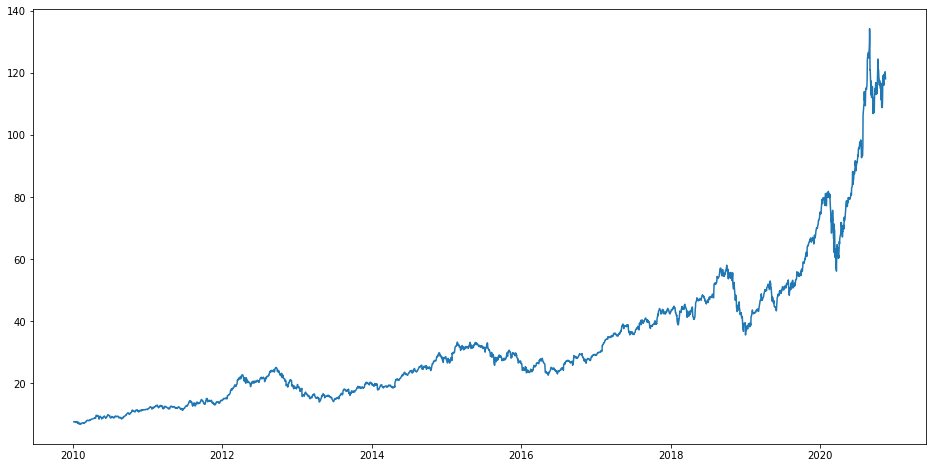

In [5]:
# Plot the data
plt.plot(df['close'])

In [6]:
# Get close price only starting from the TRAIN_START date
data = df.loc[df.index >= TRAIN_START, 'close'].to_frame()
# Split data into training and test sets
train = data.loc[data.index < TEST_START]
test = data.loc[data.index >= TEST_START]

In [7]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [8]:
# Get training data
X_train, y_train = get_features_labels(train_scaled, SEQ_LEN)
# Get test data
X_test, _ = get_features_labels(test_scaled, SEQ_LEN)

# Stacked LSTM

In [9]:
# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=N_HIDDEN, activation='elu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=N_HIDDEN, activation='elu'))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.3, verbose=2)
model.save('models/{}_stacked_lstm.h5'.format(TICKER))

Epoch 1/100
27/27 - 24s - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 2/100
27/27 - 18s - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 3/100
27/27 - 18s - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 4/100
27/27 - 17s - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 5/100
27/27 - 17s - loss: 9.7681e-04 - mse: 9.7681e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 6/100
27/27 - 17s - loss: 8.5619e-04 - mse: 8.5619e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 7/100
27/27 - 17s - loss: 9.8123e-04 - mse: 9.8123e-04 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 8/100
27/27 - 18s - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 9/100
27/27 - 18s - loss: 8.6224e-04 - mse: 8.6224e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 10/100
27/27 - 20s - loss: 7.9713e-04 - mse: 7.9713e-04 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 11/100
27/27 - 17s - loss: 7.5546e-04 - mse: 7.5546e-

Epoch 81/100
27/27 - 12s - loss: 2.6806e-04 - mse: 2.6806e-04 - val_loss: 7.4431e-04 - val_mse: 7.4431e-04
Epoch 82/100
27/27 - 12s - loss: 3.1238e-04 - mse: 3.1238e-04 - val_loss: 5.6332e-04 - val_mse: 5.6332e-04
Epoch 83/100
27/27 - 11s - loss: 2.9108e-04 - mse: 2.9108e-04 - val_loss: 5.1649e-04 - val_mse: 5.1649e-04
Epoch 84/100
27/27 - 11s - loss: 2.7778e-04 - mse: 2.7778e-04 - val_loss: 5.2985e-04 - val_mse: 5.2985e-04
Epoch 85/100
27/27 - 11s - loss: 3.1568e-04 - mse: 3.1568e-04 - val_loss: 8.3790e-04 - val_mse: 8.3790e-04
Epoch 86/100
27/27 - 11s - loss: 2.8339e-04 - mse: 2.8339e-04 - val_loss: 9.1726e-04 - val_mse: 9.1726e-04
Epoch 87/100
27/27 - 12s - loss: 2.9450e-04 - mse: 2.9450e-04 - val_loss: 6.3948e-04 - val_mse: 6.3948e-04
Epoch 88/100
27/27 - 11s - loss: 2.9385e-04 - mse: 2.9385e-04 - val_loss: 5.2413e-04 - val_mse: 5.2413e-04
Epoch 89/100
27/27 - 11s - loss: 2.9873e-04 - mse: 2.9873e-04 - val_loss: 5.3989e-04 - val_mse: 5.3989e-04
Epoch 90/100
27/27 - 11s - loss: 2.78

In [9]:
# Load the best saved model
model = load_model('models/{}_stacked_lstm.h5'.format(TICKER))

In [10]:
# Make predictions
preds = model.predict(X_test)
preds_unscaled = scaler.inverse_transform(preds)
preds_unscaled = pd.DataFrame(data=preds_unscaled, index=test.index[test.shape[0] - preds_unscaled.shape[0]:])

In [11]:
# Shift preds up by 1 so that it's convenient for backtesting
preds_shifted = preds_unscaled.shift(-1)
# Merge all into 1 dataframe and save results into a csv
res = df.merge(preds_shifted, how='right', left_index=True, right_index=True)
res.rename(columns={0: 'preds'}, inplace=True)
res.to_csv('{}{}_preds_stacked_lstm.csv'.format(OUTPUT_PATH, TICKER))
res.head()

,open,high,close,volume,preds
date,,,,,
2020-03-30,62.685,63.880,63.703,167976440.0,63.337105
2020-03-31,63.900,65.623,63.572,196157656.0,62.746178
2020-04-01,61.625,62.180,60.227,174404196.0,60.450264
2020-04-02,60.085,61.288,61.233,165273044.0,59.349625
2020-04-03,60.700,61.425,60.352,129880068.0,58.850666


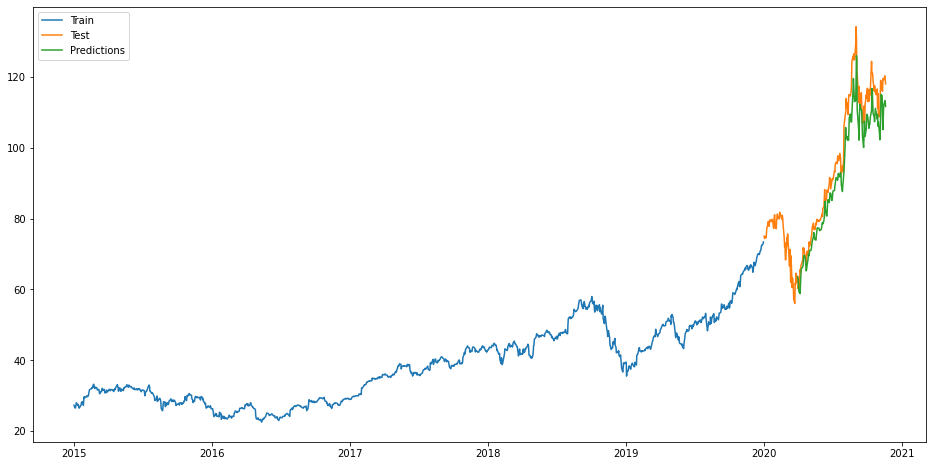

In [12]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(preds_unscaled, label='Predictions')
plt.legend()

In [13]:
# Get MSEs
train_mse = history.history['mse']
valid_mse = history.history['val_mse']
test_mse = mean_squared_error(test[test.shape[0] - preds_unscaled.shape[0]:], preds_unscaled)
test_mse

40.580823949932956

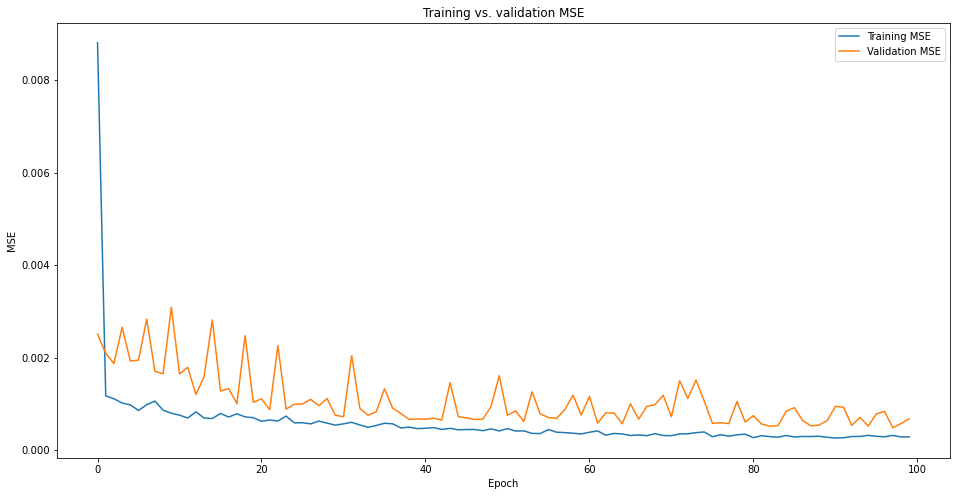

In [14]:
plt.plot(train_mse, label='Training MSE'), 
plt.plot(valid_mse, label='Validation MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.title('Training vs. validation MSE')
plt.legend()

# Encoder-Decoder LSTM

In [9]:
y_train = np.reshape(y_train, (y_train.shape[0], FORECAST_HORIZON, 1))

In [10]:
input_train = Input(shape=(X_train.shape[1], X_train.shape[2]))
output_train = Input(shape=(y_train.shape[1], y_train.shape[2]))
encoder_last_h1, encoder_last_h2, encoder_last_c = LSTM(
    units=N_HIDDEN, activation='elu',
    return_sequences=False, return_state=True)(input_train)

decoder = RepeatVector(output_train.shape.as_list()[1])(encoder_last_h1)
decoder = LSTM(units=N_HIDDEN, activation='elu',
               return_state=False, return_sequences=True)(
    decoder, initial_state=(encoder_last_h1, encoder_last_c))
decoder = Dropout(rate=0.2)(decoder)
out = TimeDistributed(Dense(1))(decoder)

model = Model(inputs=input_train, outputs=out)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.3, verbose=2)
model.save('models/{}_encoder_decoder_lstm.h5'.format(TICKER))

Epoch 1/100
27/27 - 13s - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 2/100
27/27 - 8s - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 3/100
27/27 - 9s - loss: 9.8574e-04 - mse: 9.8574e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4/100
27/27 - 9s - loss: 9.1222e-04 - mse: 9.1222e-04 - val_loss: 9.8206e-04 - val_mse: 9.8206e-04
Epoch 5/100
27/27 - 8s - loss: 9.3571e-04 - mse: 9.3571e-04 - val_loss: 9.2862e-04 - val_mse: 9.2862e-04
Epoch 6/100
27/27 - 8s - loss: 8.0742e-04 - mse: 8.0742e-04 - val_loss: 9.0550e-04 - val_mse: 9.0550e-04
Epoch 7/100
27/27 - 8s - loss: 8.4883e-04 - mse: 8.4883e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 8/100
27/27 - 8s - loss: 8.8387e-04 - mse: 8.8387e-04 - val_loss: 9.7200e-04 - val_mse: 9.7200e-04
Epoch 9/100
27/27 - 8s - loss: 7.1247e-04 - mse: 7.1247e-04 - val_loss: 9.2058e-04 - val_mse: 9.2058e-04
Epoch 10/100
27/27 - 8s - loss: 6.8193e-04 - mse: 6.8193e-04 - val_loss: 7.8225e-04 - val_mse: 7.8225e

27/27 - 9s - loss: 2.7658e-04 - mse: 2.7658e-04 - val_loss: 4.5606e-04 - val_mse: 4.5606e-04
Epoch 80/100
27/27 - 8s - loss: 2.8605e-04 - mse: 2.8605e-04 - val_loss: 6.8449e-04 - val_mse: 6.8449e-04
Epoch 81/100
27/27 - 9s - loss: 3.2707e-04 - mse: 3.2707e-04 - val_loss: 4.5104e-04 - val_mse: 4.5104e-04
Epoch 82/100
27/27 - 9s - loss: 2.6776e-04 - mse: 2.6776e-04 - val_loss: 4.7230e-04 - val_mse: 4.7230e-04
Epoch 83/100
27/27 - 9s - loss: 2.7157e-04 - mse: 2.7157e-04 - val_loss: 4.1298e-04 - val_mse: 4.1298e-04
Epoch 84/100
27/27 - 7s - loss: 2.6013e-04 - mse: 2.6013e-04 - val_loss: 4.4980e-04 - val_mse: 4.4980e-04
Epoch 85/100
27/27 - 6s - loss: 2.9515e-04 - mse: 2.9515e-04 - val_loss: 5.4527e-04 - val_mse: 5.4527e-04
Epoch 86/100
27/27 - 6s - loss: 2.8563e-04 - mse: 2.8563e-04 - val_loss: 4.1285e-04 - val_mse: 4.1285e-04
Epoch 87/100
27/27 - 6s - loss: 2.8268e-04 - mse: 2.8268e-04 - val_loss: 4.5020e-04 - val_mse: 4.5020e-04
Epoch 88/100
27/27 - 5s - loss: 2.7845e-04 - mse: 2.7845e-0

In [9]:
# Load the best saved model
model = load_model('models/{}_encoder_decoder_lstm.h5'.format(TICKER))

In [10]:
# Make predictions
preds = model.predict(X_test)
preds_unscaled = scaler.inverse_transform(np.reshape(preds, (preds.shape[0], 1)))
preds_unscaled = pd.DataFrame(data=preds_unscaled, index=test.index[test.shape[0] - preds_unscaled.shape[0]:])

In [11]:
# Shift preds up by 1 so that it's convenient for backtesting
preds_shifted = preds_unscaled.shift(-1)
# Merge all into 1 dataframe and save results into a csv
res = df.merge(preds_shifted, how='right', left_index=True, right_index=True)
res.rename(columns={0: 'preds'}, inplace=True)
res.to_csv('{}{}_preds_encoder_decoder_lstm.csv'.format(OUTPUT_PATH, TICKER))
res.head()

,open,high,close,volume,preds
date,,,,,
2020-03-30,62.685,63.880,63.703,167976440.0,63.896626
2020-03-31,63.900,65.623,63.572,196157656.0,63.956764
2020-04-01,61.625,62.180,60.227,174404196.0,61.789337
2020-04-02,60.085,61.288,61.233,165273044.0,61.176132
2020-04-03,60.700,61.425,60.352,129880068.0,60.428875


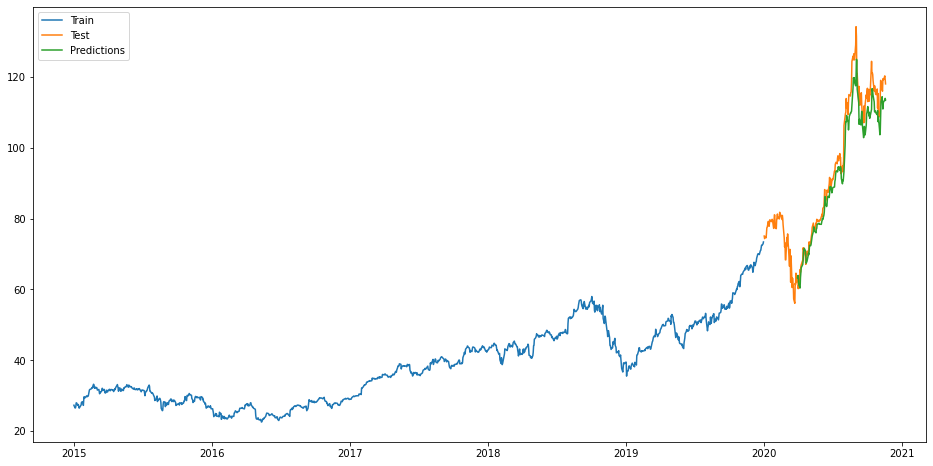

In [13]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(preds_unscaled, label='Predictions')
plt.legend()

In [14]:
# Get MSEs
train_mse = history.history['mse']
valid_mse = history.history['val_mse']
test_mse = mean_squared_error(test[test.shape[0] - preds_unscaled.shape[0]:], preds_unscaled)
test_mse

24.50500691029412

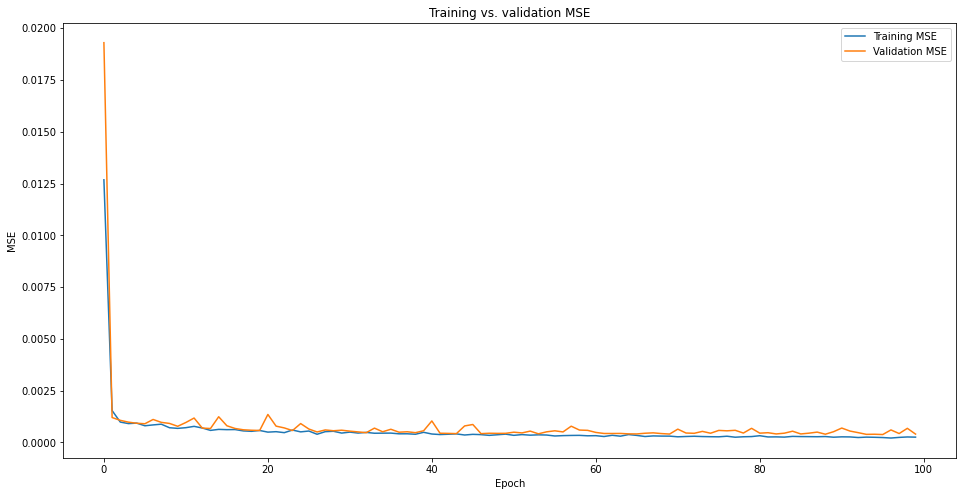

In [15]:
plt.plot(train_mse, label='Training MSE'), 
plt.plot(valid_mse, label='Validation MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.title('Training vs. validation MSE')
plt.legend()

# Encoder-Decoder LSTM with Attention

In [9]:
y_train = np.reshape(y_train, (y_train.shape[0], FORECAST_HORIZON, 1))

In [10]:
input_train = Input(shape=(X_train.shape[1], X_train.shape[2]))
output_train = Input(shape=(y_train.shape[1], y_train.shape[2]))
encoder_stack_h, encoder_last_h, encoder_last_c = LSTM(
    units=N_HIDDEN, activation='elu',
    return_state=True, return_sequences=True)(input_train)

decoder_input = RepeatVector(output_train.shape.as_list()[1])(encoder_last_h)
decoder_stack_h = LSTM(units=N_HIDDEN, activation='elu',
               return_state=False, return_sequences=True)(
    decoder_input, initial_state=[encoder_last_h, encoder_last_c])
attention = dot([decoder_stack_h, encoder_stack_h], axes=[2, 2])
attention = Activation('softmax')(attention)
context = dot([attention, encoder_stack_h], axes=[2,1])
decoder_combined_context = concatenate([context, decoder_stack_h])
decoder_combined_context = Dropout(rate=0.2)(decoder_combined_context)
out = TimeDistributed(Dense(1))(decoder_combined_context)

model = Model(inputs=input_train, outputs=out)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.3, verbose=2)
model.save('models/{}_encoder_decoder_lstm_attention.h5'.format(TICKER))

Epoch 1/100
27/27 - 7s - loss: 0.0141 - mse: 0.0141 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 2/100
27/27 - 6s - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 3/100
27/27 - 6s - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 4/100
27/27 - 6s - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 5/100
27/27 - 6s - loss: 9.9618e-04 - mse: 9.9618e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 6/100
27/27 - 6s - loss: 8.8580e-04 - mse: 8.8580e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 7/100
27/27 - 6s - loss: 8.4487e-04 - mse: 8.4487e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 8/100
27/27 - 5s - loss: 8.2989e-04 - mse: 8.2989e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 9/100
27/27 - 6s - loss: 8.7701e-04 - mse: 8.7701e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 10/100
27/27 - 6s - loss: 7.6948e-04 - mse: 7.6948e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 11/100
27/27 - 5s - loss: 7.6981e-04 - mse: 7.6981e-04 

27/27 - 6s - loss: 2.6333e-04 - mse: 2.6333e-04 - val_loss: 7.0562e-04 - val_mse: 7.0562e-04
Epoch 82/100
27/27 - 6s - loss: 2.6389e-04 - mse: 2.6389e-04 - val_loss: 6.8565e-04 - val_mse: 6.8565e-04
Epoch 83/100
27/27 - 6s - loss: 2.5770e-04 - mse: 2.5770e-04 - val_loss: 7.1974e-04 - val_mse: 7.1974e-04
Epoch 84/100
27/27 - 5s - loss: 2.3939e-04 - mse: 2.3939e-04 - val_loss: 6.7792e-04 - val_mse: 6.7792e-04
Epoch 85/100
27/27 - 6s - loss: 2.5498e-04 - mse: 2.5498e-04 - val_loss: 7.2713e-04 - val_mse: 7.2713e-04
Epoch 86/100
27/27 - 6s - loss: 2.7053e-04 - mse: 2.7053e-04 - val_loss: 9.5452e-04 - val_mse: 9.5452e-04
Epoch 87/100
27/27 - 6s - loss: 2.5501e-04 - mse: 2.5501e-04 - val_loss: 8.3526e-04 - val_mse: 8.3526e-04
Epoch 88/100
27/27 - 6s - loss: 2.7140e-04 - mse: 2.7140e-04 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 89/100
27/27 - 6s - loss: 2.5703e-04 - mse: 2.5703e-04 - val_loss: 8.8168e-04 - val_mse: 8.8168e-04
Epoch 90/100
27/27 - 6s - loss: 2.4335e-04 - mse: 2.4335e-04 - val_

In [13]:
# Load the best saved model
model = load_model('models/{}_encoder_decoder_lstm_attention.h5'.format(TICKER))

In [14]:
# Make predictions
preds = model.predict(X_test)
preds_unscaled = scaler.inverse_transform(np.reshape(preds, (preds.shape[0], 1)))
preds_unscaled = pd.DataFrame(data=preds_unscaled, index=test.index[test.shape[0] - preds_unscaled.shape[0]:])

In [15]:
# Shift preds up by 1 so that it's convenient for backtesting
preds_shifted = preds_unscaled.shift(-1)
# Merge all into 1 dataframe and save results into a csv
res = df.merge(preds_shifted, how='right', left_index=True, right_index=True)
res.rename(columns={0: 'preds'}, inplace=True)
res.to_csv('{}{}_preds_encoder_decoder_attention_lstm.csv'.format(OUTPUT_PATH, TICKER))
res.head()

,open,high,close,volume,preds
date,,,,,
2020-03-30,62.685,63.880,63.703,167976440.0,65.956444
2020-03-31,63.900,65.623,63.572,196157656.0,65.899406
2020-04-01,61.625,62.180,60.227,174404196.0,63.758358
2020-04-02,60.085,61.288,61.233,165273044.0,63.072159
2020-04-03,60.700,61.425,60.352,129880068.0,62.328102


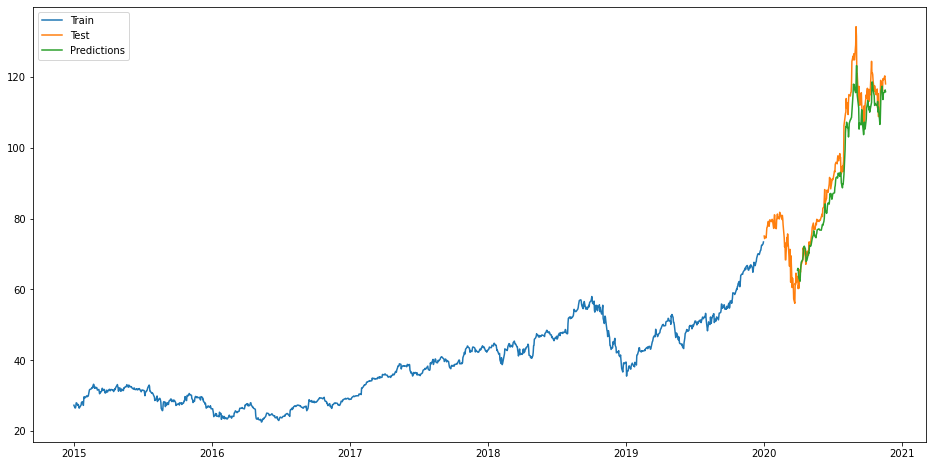

In [13]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(preds_unscaled, label='Predictions')
plt.legend()

In [14]:
# Get MSEs
train_mse = history.history['mse']
valid_mse = history.history['val_mse']
test_mse = mean_squared_error(test[test.shape[0] - preds_unscaled.shape[0]:], preds_unscaled)
test_mse

27.113471057373765

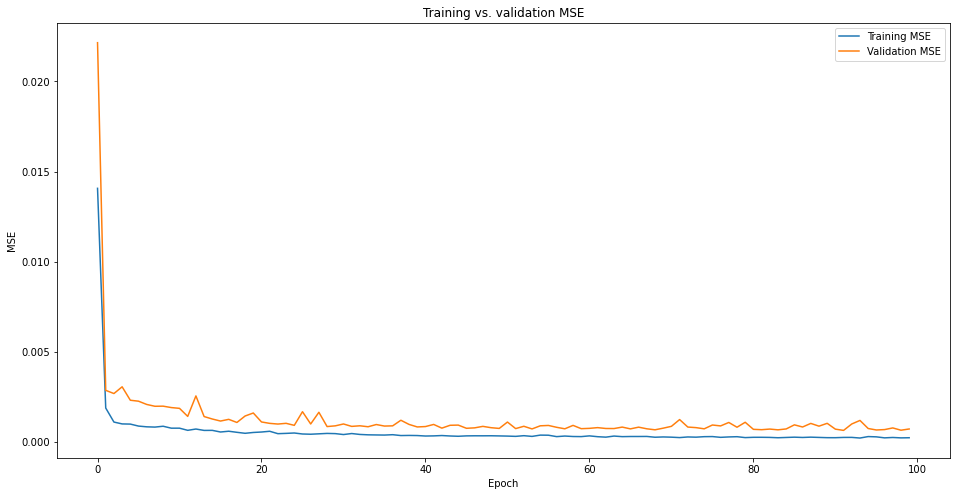

In [15]:
plt.plot(train_mse, label='Training MSE'), 
plt.plot(valid_mse, label='Validation MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.title('Training vs. validation MSE')
plt.legend()